### Regresion No Lineal

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("csv/china_gdp.csv")
df.head()
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### Se grafica los datos del universo

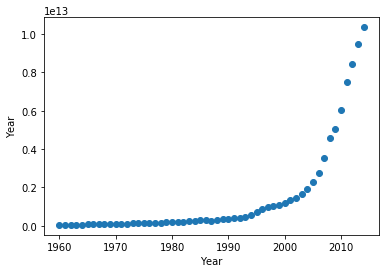

In [9]:
cdf=df[['Year','Value']]
cdf.head(9)
plt.scatter(cdf.Year,cdf.Value)
plt.xlabel('Year')
plt.ylabel('Year')
plt.show()

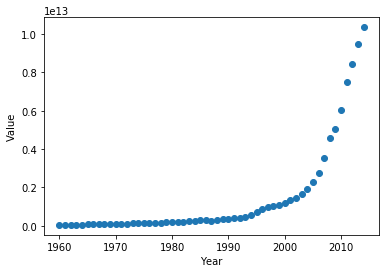

In [10]:
x_data,y_data = (df["Year"].values,df["Value"].values)
plt.scatter(x_data,y_data)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

<!-- # Se selecciona el conjunto de datos de Entrenamiento y de **Prueba**  -->

# Se selecciona el conjunto de datos de prueba y de test 

In [11]:
msk=np.random.rand(len(df))<0.8
msk=np.random.rand(len(df))<0.8
print(msk)
train=df[msk]
test=df[~msk]
print('train ,test',len(train),len(test))


[ True False  True  True  True  True  True False  True  True  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True False
  True  True False  True  True False  True  True  True  True  True  True
  True False  True False  True  True  True]
train ,test 44 11


### Grafica de los datos de train

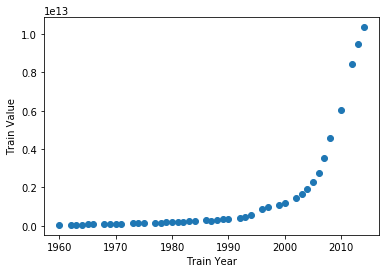

In [12]:
plt.scatter(train.Year,train.Value)
plt.xlabel('Train Year')
plt.ylabel('Train Value')
plt.show()

### Aplicamos Regresion


In [13]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=train[['Year']]
train_y=train[['Value']]
regr.fit(train_x,train_y)
print(regr.coef_)
print(regr.intercept_)


[[1.14497375e+11]]
[-2.26066464e+14]


# Se genera el modelo (FUNCION ESPERADA)

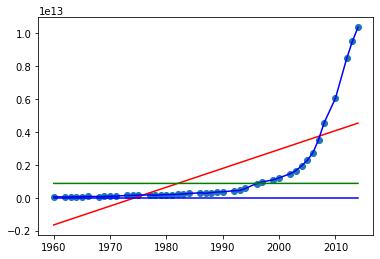

In [14]:
Ey=regr.intercept_[0]+regr.coef_[0][0]*train_x
plt.scatter(train_x,train_y)
plt.plot(train_x,Ey,'-r')
plt.plot(train_x,train_y,'-b')
plt.plot(train_x,np.log(train_y),'-b')
EyLog=regr.coef_[0][0]*np.log(train_x,)
plt.plot(train_x,EyLog,'-g')
plt.show()

# Se genera el modelo (FUNCION ESPERADA)

In [18]:
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Year']])
train_y=np.asanyarray(train[['Value']])
train_new_x=np.hstack([train_x,train_x**2,train_x**3,train_x**4])
print(train_x.shape)
print('x_hstack shape',train_new_x.shape)
print('x_train shape',train_x.shape)
regr.fit(train_new_x,train_y)
print('Coef',regr.coef_)
print('Intercept',regr.intercept_)


(44, 1)
x_hstack shape (44, 4)
x_train shape (44, 1)
Coef [[ 6.41761629e+08  8.50210740e+11 -5.72579997e+08  1.08450154e+05]]
Intercept [-5.55405432e+17]


# Evaluacion Test Prueba

(11, 1)
x_hstack shape (11, 4)
x_train shape (11, 1)
Coef [[ 6.41761629e+08  8.50210740e+11 -5.72579997e+08  1.08450154e+05]]
Intercept [-5.55405432e+17]


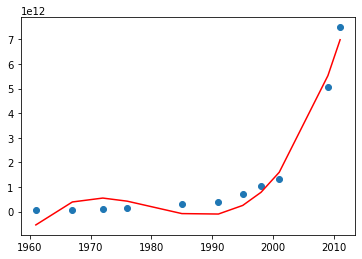

In [19]:
test_x=np.asanyarray(test[['Year']])
test_y=np.asanyarray(test[['Value']])
test_new_x=np.hstack([test_x,test_x**2,test_x**3,test_x**4])
print(test_x.shape)
print('x_hstack shape',test_new_x.shape)
print('x_train shape',test_x.shape)
pred_Ey = regr.predict(test_new_x)
print('Coef',regr.coef_)
print('Intercept',regr.intercept_)
plt.scatter(test_x,test_y)
plt.plot(test_x,pred_Ey,'-r')
plt.show()

In [37]:
import math
mae=np.mean(np.absolute(test_y-pred_Ey))
print('MAE',mae)
mse=np.mean(pow(test_y-pred_Ey,2))
print('MSE',mse)
rmse=math.sqrt(mse)
print('RMSE',rmse)
rae=np.sum(np.absolute(test_y-pred_Ey))/np.sum(np.absolute(test_y-np.mean(test_y)))
print('RAE',rae)
rse=np.sum(pow(test_y-pred_Ey,2))/np.sum(pow(test_y-np.mean(test_y),2))
print('RSE',rse)
r2=1-rse
print('R2',r2)

MAE 404834564492.0887
MSE 1.7575774291987644e+23
RMSE 419234711015.05475
RAE 0.23406677065252193
RSE 0.03223405855412875
R2 0.9677659414458712


In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(test_y,pred_Ey)
print('MAE',mae)
mse=mean_squared_error(test_y,pred_Ey)
print('MSE',mse)
r2=r2_score(test_y,pred_Ey)
print('R2',r2)
RSE=1-r2
print('RSE',RSE)

MAE 404834564492.0887
MSE 1.7575774291987644e+23
R2 0.9677659414458712
RSE 0.03223405855412875
